# Henry Fernandez - Loan Prediction

Step 1:
Clean and prepare your data: There are several entries where values have been deleted to simulate dirty data. Please clean the data with whatever method(s) you believe is best/most suitable. Note that some of the missing values are truly blank (unknown answers) and thus may be impossible to clean; use your discretion.


## Data Cleaning and Preperation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
%pwd

'C:\\Users\\hdfer\\OneDrive\\Desktop\\Henry\\Uchicago\\Quarter 2\\Data Mining Principles\\Week-6\\Assignment_3\\Loan_Prediction'

In [4]:
data = pd.read_csv('Data for Cleaning & Modeling.csv')
data.head()

C:\Users\hdfer\AppData\Local\Temp/ipykernel_23852/595085452.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Data for Cleaning & Modeling.csv')


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [5]:
data.columns = ['interest_rate', 'loan_id', 'borrower_id', 'loan_requested','loan_funded','invester_portion','num_payments',
                'loan_grade','loan_subgrade','job_title','years_employed','home_ownership_status','borrower_annual_income',
                'income_verified','date_issued','loan_reason','loan_category','loan_title','zipcode_3','borrower_state',
                'ratio','num_pastdue','earliest_reported_date','num_creditor_inquiries','months_since_borrower_last_delinquency',
                'months_since_last_public_record','num_borrower_open_creditlines','num_derogatory_public_records',
                'credit_revolving_balance', 'revolving_line_utilization_rate','num_borrower_credit_lines','loan_initial_listing_status']
                

In [6]:
data.head()
data.shape

(400000, 32)

In [7]:
data.isna().sum()

interest_rate                              61010
loan_id                                        1
borrower_id                                    1
loan_requested                                 1
loan_funded                                    1
invester_portion                               1
num_payments                                   1
loan_grade                                 61270
loan_subgrade                              61270
job_title                                  23986
years_employed                             17538
home_ownership_status                      61361
borrower_annual_income                     61028
income_verified                                1
date_issued                                    1
loan_reason                               276440
loan_category                                  1
loan_title                                    19
zipcode_3                                      1
borrower_state                                 1
ratio               

Columns with major missing values:
   
   - Here:
    - interest_rate\
    - loan_grade (impute ?)
    - loan_subgrade
    - job_title
    - years_employed
    - home_ownership_status
    - borrower_annual_income
    - loan_reason
    - months_since_borrower_last_delinquency
    - months_since_last_public_record
    - revolving_line_utilization_rate (not missing too many)

#### Clean Interest Rate & Drop Missing Values

In [8]:
data['interest_rate'] = data['interest_rate'].str.rstrip('%').astype('float')

C:\Users\hdfer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='interest_rate', ylabel='Density'>

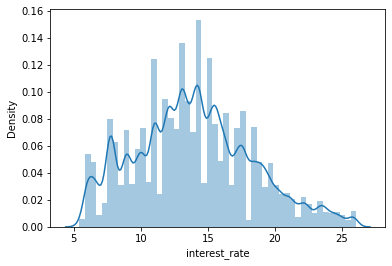

In [9]:
data = data.dropna(subset=['interest_rate'])

sns.distplot(data[data['interest_rate'].notnull()]['interest_rate'])

#### Fill Loan Grade Nulls with most common (B)

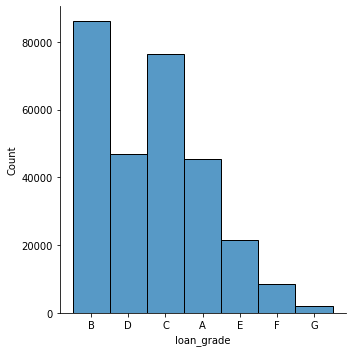

In [10]:
sns.displot(data[data['loan_grade'].notnull()]['loan_grade'])

In [11]:
# print(data.loan_grade.value_counts())
# data['loan_grade'] = data['loan_grade'].fillna('B')

In [12]:
# sns.displot(data[data['loan_grade'].notnull()]['loan_grade'])

Probably shouldn't do this.

Fill loan subgrade nans. What's the best way to go about this ?

(array([34658.,  9091., 16310., 15425.,  8573., 20352., 13723., 13086.,
        10498., 14344., 14646., 11806.,  7653., 16342.,  3640., 16767.,
        11742.,  5447., 11720.,  2490.,  1873.,  6484.,  1712.,  3065.,
         7102.,  4230.,  1331.,   206.,   989.,   677.,   252.,   889.]),
 array([ 0.    ,  1.0625,  2.125 ,  3.1875,  4.25  ,  5.3125,  6.375 ,
         7.4375,  8.5   ,  9.5625, 10.625 , 11.6875, 12.75  , 13.8125,
        14.875 , 15.9375, 17.    , 18.0625, 19.125 , 20.1875, 21.25  ,
        22.3125, 23.375 , 24.4375, 25.5   , 26.5625, 27.625 , 28.6875,
        29.75  , 30.8125, 31.875 , 32.9375, 34.    ]),
 <BarContainer object of 32 artists>)

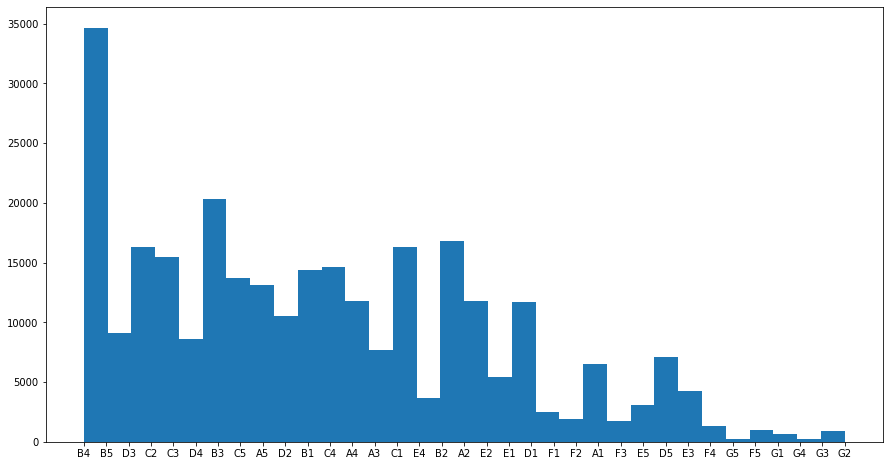

In [13]:
plt.figure(figsize = (15,8))
plt.hist(x = data[data['loan_subgrade'].notnull()]['loan_subgrade'], bins = 32)

In [14]:
# data['loan_subgrade'] = data['loan_subgrade'].fillna('B3')
# sns.displot(data[data['loan_subgrade'].notnull()]['loan_subgrade'])

Most common imputaiton for loan_subgrade doesn't work either. distribution is very messed up

Investigate Job Title Nans

In [15]:
len(data.job_title.unique()) / len(data.job_title)

0.482008318829464

Almost half ot the job titles are unique. Not sure there is any useful predictive value here. Going to drop it

In [16]:
data = data.drop('job_title',axis = 1)

Investiage Years Employed

(array([ 26003.,  21432., 108491.,  19601.,  12893.,  26670.,  23072.,
         30117.,  20259.,  16212.,  19445.]),
 array([ 0.        ,  0.90909091,  1.81818182,  2.72727273,  3.63636364,
         4.54545455,  5.45454545,  6.36363636,  7.27272727,  8.18181818,
         9.09090909, 10.        ]),
 <BarContainer object of 11 artists>)

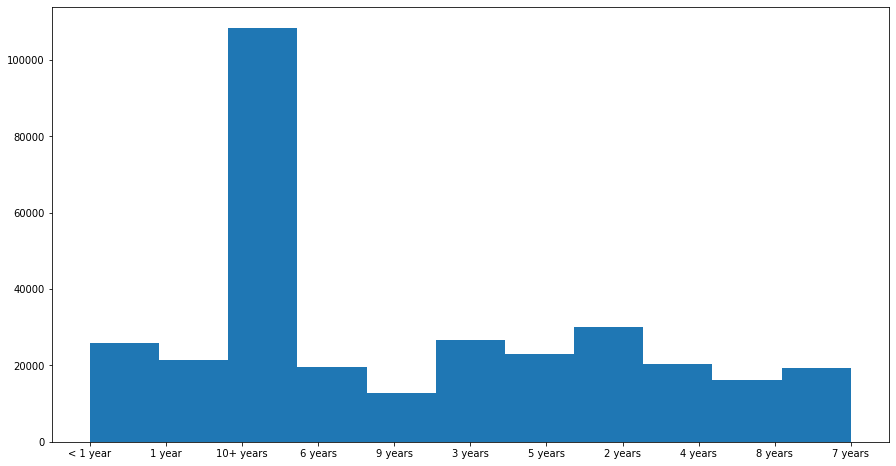

In [17]:
plt.figure(figsize = (15,8))
plt.hist(x = data[data['years_employed'].notnull()]['years_employed'], bins = 11)

In [18]:
data['years_employed'] = data['years_employed'].fillna('10+ years')

(array([ 26003.,  21432., 123286.,  19601.,  12893.,  26670.,  23072.,
         30117.,  20259.,  16212.,  19445.]),
 array([ 0.        ,  0.90909091,  1.81818182,  2.72727273,  3.63636364,
         4.54545455,  5.45454545,  6.36363636,  7.27272727,  8.18181818,
         9.09090909, 10.        ]),
 <BarContainer object of 11 artists>)

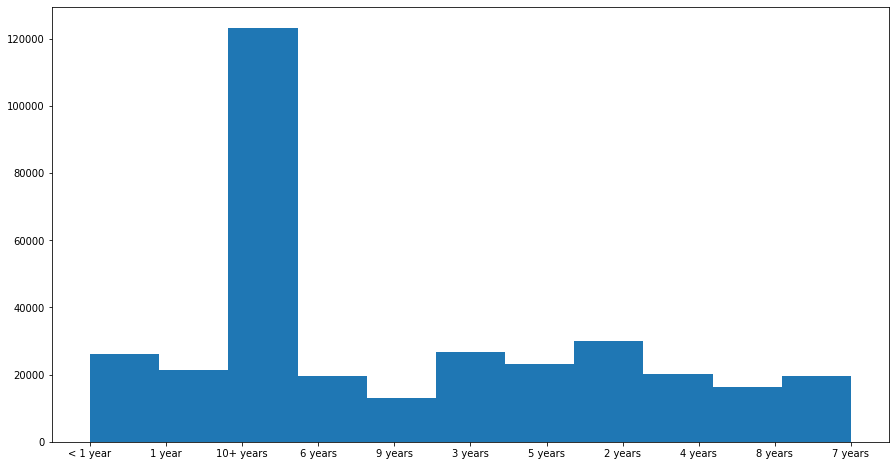

In [19]:
plt.figure(figsize = (15,8))
plt.hist(x = data[data['years_employed'].notnull()]['years_employed'], bins = 11)

I'll keep this one for now. Distribution about the same.

In [20]:
data.isna().sum()

interest_rate                                  0
loan_id                                        1
borrower_id                                    1
loan_requested                                 1
loan_funded                                    1
invester_portion                               1
num_payments                                   1
loan_grade                                 51867
loan_subgrade                              51867
years_employed                                 0
home_ownership_status                      51960
borrower_annual_income                     51752
income_verified                                1
date_issued                                    1
loan_reason                               233934
loan_category                                  1
loan_title                                    17
zipcode_3                                      1
borrower_state                                 1
ratio                                          1
num_pastdue         

#### Investigate home_ownership_status

(array([1.15958e+05, 0.00000e+00, 2.49760e+04, 0.00000e+00, 1.45958e+05,
        0.00000e+00, 3.00000e+01, 0.00000e+00, 1.07000e+02, 0.00000e+00,
        1.00000e+00]),
 array([0.        , 0.45454545, 0.90909091, 1.36363636, 1.81818182,
        2.27272727, 2.72727273, 3.18181818, 3.63636364, 4.09090909,
        4.54545455, 5.        ]),
 <BarContainer object of 11 artists>)

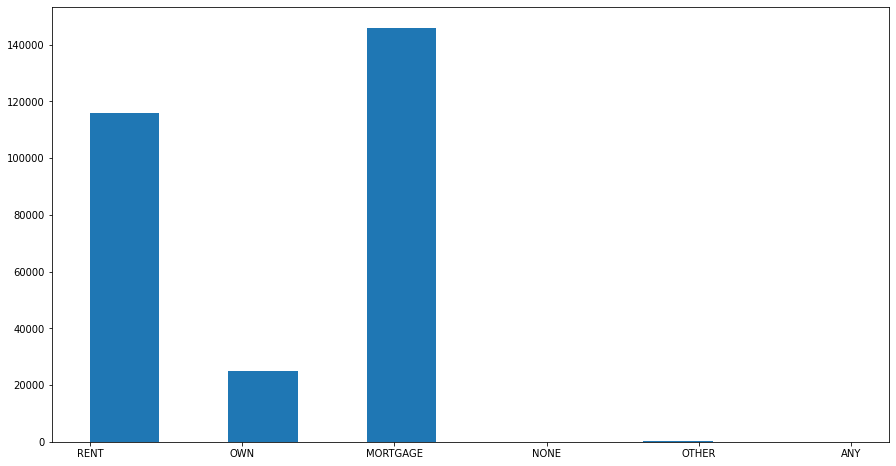

In [21]:
plt.figure(figsize = (15,8))
plt.hist(x = data[data['home_ownership_status'].notnull()]['home_ownership_status'], bins = 11)

In [22]:
data.home_ownership_status.value_counts()

MORTGAGE    145958
RENT        115958
OWN          24976
OTHER          107
NONE            30
ANY              1
Name: home_ownership_status, dtype: int64

In [23]:
# not_useful_values = data.loc[(data['home_ownership_status'] == "NONE") | (data['home_ownership_status'] == "OTHER") | (data['home_ownership_status'] == "ANY") ]

# not_useful_values = not_useful_values.reset_index()
# not_useful_rows = not_useful_values.iloc[:,0]
# data = data.drop(data.index[not_useful_rows], axis = 0)

(array([1.15958e+05, 0.00000e+00, 2.49760e+04, 0.00000e+00, 1.45958e+05,
        0.00000e+00, 3.00000e+01, 0.00000e+00, 1.07000e+02, 1.00000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

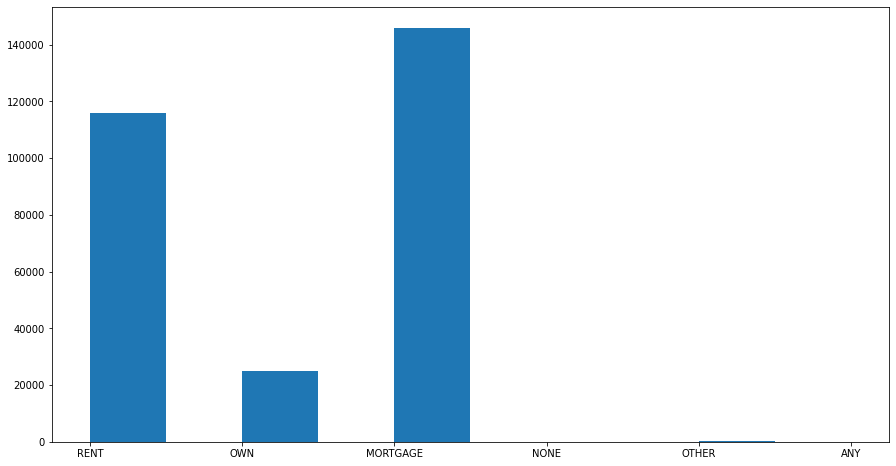

In [24]:
plt.figure(figsize = (15,8))
plt.hist(x = data[data['home_ownership_status'].notnull()]['home_ownership_status'])

#### INVESTIGATE LOAN_REASON

In [25]:
data.loan_reason.value_counts()

                                                                                                                                                                                                                                                                                                                                         190
Debt Consolidation                                                                                                                                                                                                                                                                                                                        10
  Borrower added on 03/10/14 > Debt consolidation<br>                                                                                                                                                                                                                                                                                      9
 

In [26]:
data = data.drop('loan_reason', axis = 1)

No predictive value here

#### INVESTIGATE LOAN_TITLE

In [27]:
len(data.loan_title.unique())

53618

In [28]:
data = data.drop('loan_title', axis = 1)

loan_title has 61k unique values. Probably should drop this

#### INVESTIGATE MONTHS SINCE BORROWER LAST DELINQUENCY

In [29]:
len(data.months_since_borrower_last_delinquency.unique())

141

C:\Users\hdfer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='months_since_borrower_last_delinquency', ylabel='Density'>

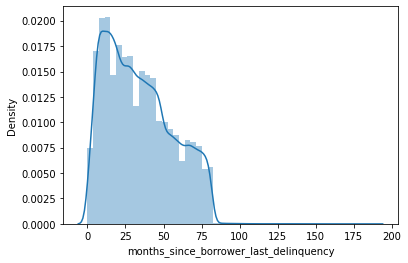

In [30]:
sns.distplot(data.months_since_borrower_last_delinquency)

C:\Users\hdfer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='months_since_borrower_last_delinquency', ylabel='Density'>

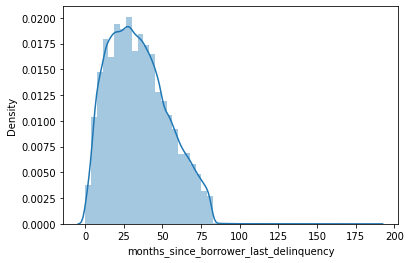

In [31]:
data['months_since_borrower_last_delinquency'] = data['months_since_borrower_last_delinquency'].interpolate()
sns.distplot(data.months_since_borrower_last_delinquency)

Distribution is relatively similar. Feels ok to keep.

#### INVESTIGATE months_since_last_public_record

C:\Users\hdfer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='months_since_last_public_record', ylabel='Density'>

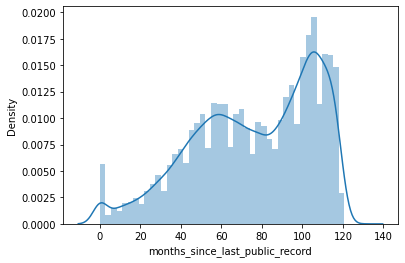

In [32]:
sns.distplot(data.months_since_last_public_record)

C:\Users\hdfer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='months_since_last_public_record', ylabel='Density'>

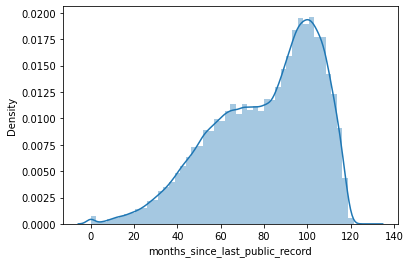

In [33]:
data['months_since_last_public_record'] = data['months_since_last_public_record'].interpolate()
sns.distplot(data.months_since_last_public_record)

This was a good interpolation. Happy with this.

#### Interpolate revolving_line_utilization_rate

C:\Users\hdfer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revolving_line_utilization_rate', ylabel='Density'>

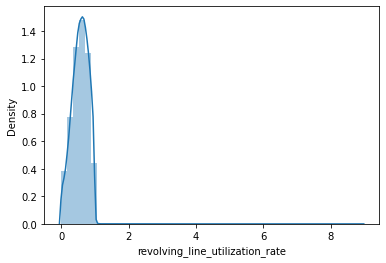

In [34]:
data['revolving_line_utilization_rate'] = data['revolving_line_utilization_rate'].str.rstrip('%').astype('float') / 100.0
sns.distplot(data.revolving_line_utilization_rate)

C:\Users\hdfer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revolving_line_utilization_rate', ylabel='Density'>

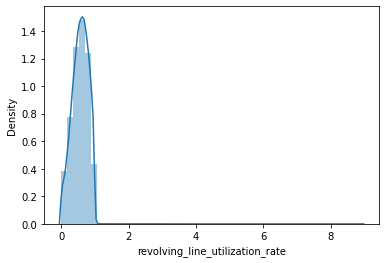

In [35]:
data['revolving_line_utilization_rate'] = data['revolving_line_utilization_rate'].interpolate()
sns.distplot(data.revolving_line_utilization_rate)

That looks good! We'll keep it :)

## OK, those were the variables with missing values. Let's quickly investigate the other variables

In [36]:
comparison_column = np.where(data["loan_funded"] == data["loan_requested"], True, False)
print(sum(comparison_column))
print(len(comparison_column))

337338
338990


loan_funded and loan_requested are all the same values. So everyone got the exact loan amount they asked for. I guess drop one

#### Drop loan_funded, years_employed, loan_id and borrower_id, date issued, and zipcode

In [37]:
data = data.drop('loan_funded',axis = 1)
data = data.drop('zipcode_3',axis = 1)
data = data.drop('years_employed',axis=1)
data = data.drop(['loan_id','borrower_id'],axis = 1)
data = data.drop('date_issued', axis = 1)

In [38]:
data.income_verified.value_counts()

VERIFIED - income           127040
not verified                107873
VERIFIED - income source    104076
Name: income_verified, dtype: int64

C:\Users\hdfer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ratio', ylabel='Density'>

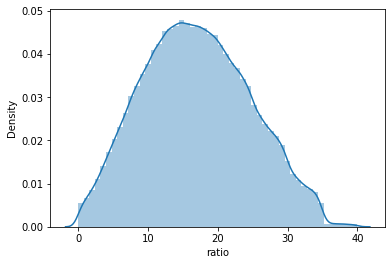

In [39]:
sns.distplot(data.ratio)

In [40]:
data.num_pastdue.value_counts()

0.0     280249
1.0      39796
2.0      11494
3.0       3964
4.0       1658
5.0        841
6.0        441
7.0        226
8.0        111
9.0         68
10.0        48
11.0        27
12.0        23
13.0        13
18.0         6
14.0         6
16.0         5
15.0         4
17.0         3
19.0         2
24.0         1
29.0         1
22.0         1
21.0         1
Name: num_pastdue, dtype: int64

In [41]:
data.loan_category.value_counts()

debt_consolidation    198226
credit_card            75680
home_improvement       19625
other                  17154
major_purchase          7312
small_business          5359
car                     4115
medical                 3329
moving                  2138
wedding                 1934
vacation                1848
house                   1723
educational              279
renewable_energy         267
Name: loan_category, dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338990 entries, 0 to 399999
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   interest_rate                           338990 non-null  float64
 1   loan_requested                          338989 non-null  object 
 2   invester_portion                        338989 non-null  object 
 3   num_payments                            338989 non-null  object 
 4   loan_grade                              287123 non-null  object 
 5   loan_subgrade                           287123 non-null  object 
 6   home_ownership_status                   287030 non-null  object 
 7   borrower_annual_income                  287238 non-null  float64
 8   income_verified                         338989 non-null  object 
 9   loan_category                           338989 non-null  object 
 10  borrower_state                          3389

In [43]:
interest_rate = data['interest_rate']

#### Investigate state, does it have any relationship with interest rate?

In [44]:
# state = pd.get_dummies(data, columns = ['borrower_state'])
# droplist = np.arange(0, 23,1).tolist()
# state.drop(state.columns[droplist], axis=1, inplace=True)
# state['y'] = interest_rate

State does noot seem to have any bearing on interest rate

In [45]:
data = data.drop('borrower_state', axis = 1)

C:\Users\hdfer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revolving_line_utilization_rate', ylabel='Density'>

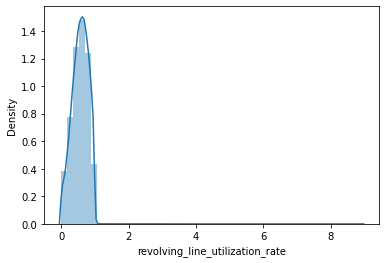

In [46]:
sns.distplot(data.revolving_line_utilization_rate)

C:\Users\hdfer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_borrower_credit_lines', ylabel='Density'>

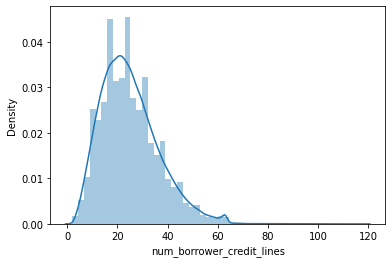

In [47]:
sns.distplot(data.num_borrower_credit_lines)

In [48]:
data.loan_initial_listing_status.value_counts()

f    232600
w    106389
Name: loan_initial_listing_status, dtype: int64

## Instead of dumping all the variables in the model, let's look to see if there are any relationships beetween the features and the interest rate

#### Loan Requested

In [49]:
# sns.set(style = 'whitegrid')
# sns.scatterplot(x = data['loan_requested'], y=data['interest_rate'], size = 6)
# # ax.map(sns.pointplot)
# # ax.set(ylim = (0,1))

Takes a while to run, no visible relationship

#### Number of Payments

In [50]:
data.num_payments.value_counts()

 36 months    247791
 60 months     91198
Name: num_payments, dtype: int64

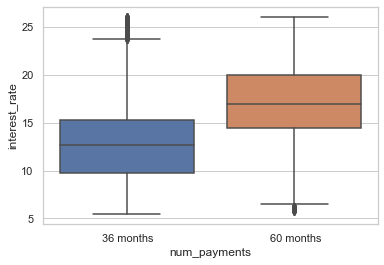

In [51]:
sns.set(style = 'whitegrid')
ax = sns.boxplot(x = data['num_payments'], y= data['interest_rate'])
# ax.map(sns.pointplot)
# ax.set(ylim = (0,1))

#### Loan Grade

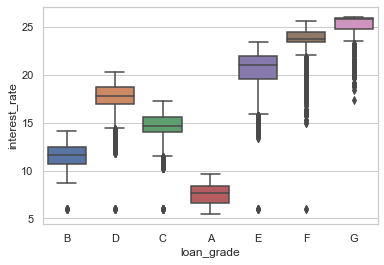

In [52]:
sns.set(style = 'whitegrid')
ax = sns.boxplot(x = data['loan_grade'], y= data['interest_rate'])
# ax.map(sns.pointplot)
# ax.set(ylim = (0,1))

Ok very Important here. A Grades have the lowest average interests rate, ascneding to G. 

#### Loan Subgrade

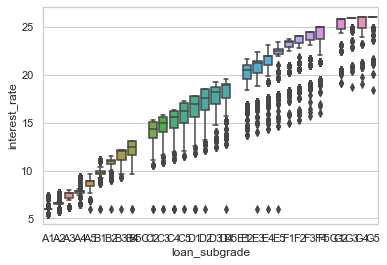

In [53]:
sns.set(style = 'whitegrid')
ax = sns.boxplot(x = data['loan_subgrade'], y= data['interest_rate'], order = ['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5'
                                                                            'C1','C2','C3','C4','C5','D1','D2','D3','D4','D5'
                                                                            'E1','E2','E3','E4','E5','F1','F2','F3','F4','F5'
                                                                            'G1','G2','G3','G4','G5'])
# ax.map(sns.pointplot)
# ax.set(ylim = (0,1))

Loan Subgrade also seems like it is useful for ML. Will keep.

#### Home Ownership Status

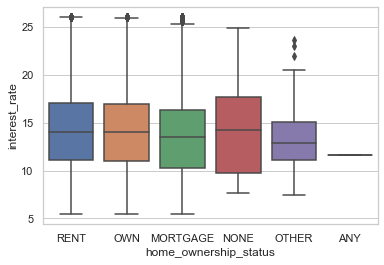

In [54]:
sns.set(style = 'whitegrid')
ax = sns.boxplot(x = data['home_ownership_status'], y= data['interest_rate'])
# ax.map(sns.pointplot)
# ax.set(ylim = (0,1))

Doesn't seem super helfpul. Can probably drop.

#### Borrower Annual Income

[(0.0, 1000000.0)]

C:\Users\hdfer\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


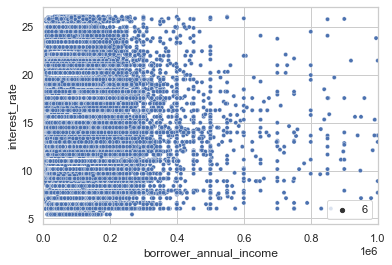

In [55]:
sns.set(style = 'whitegrid')
ax = sns.scatterplot(x = data['borrower_annual_income'], y=data['interest_rate'], size = 6)
ax.set(xlim = (0,1e6))


In [56]:
data['interest_rate'].corr(data['borrower_annual_income'])

-0.03220667298316868

Not super sure about this one

#### Income Verified

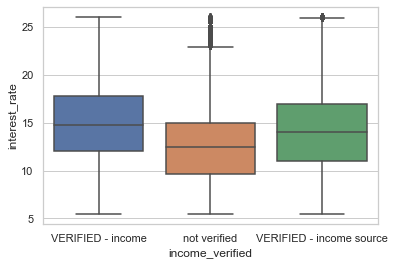

In [57]:
sns.set(style = 'whitegrid')
ax = sns.boxplot(x = data['income_verified'], y= data['interest_rate'])
# ax.map(sns.pointplot)
# ax.set(ylim = (0,1))

Decent. Fine to keep I think

#### Loan Category

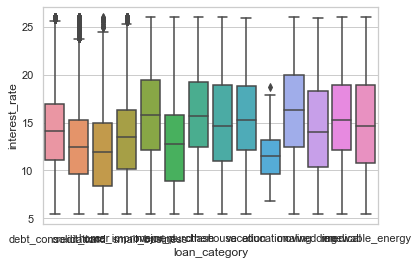

In [58]:
sns.set(style = 'whitegrid')
ax = sns.boxplot(x = data['loan_category'], y= data['interest_rate'])
# ax.map(sns.pointplot)
# ax.set(ylim = (0,1))

#### Ratio

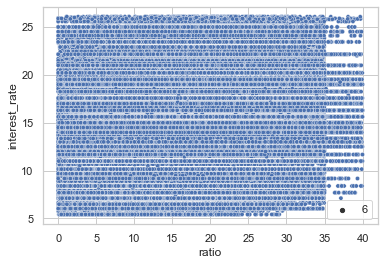

In [59]:
sns.set(style = 'whitegrid')
ax = sns.scatterplot(x = data['ratio'], y=data['interest_rate'], size = 6)


#### Num Pastdue

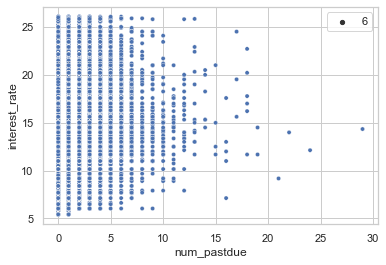

In [60]:
sns.set(style = 'whitegrid')
ax = sns.scatterplot(x = data['num_pastdue'], y=data['interest_rate'], size = 6)

#### Num_creditor_inquiries

In [61]:
data['interest_rate'].corr(data['num_pastdue'])

0.09166122920703024

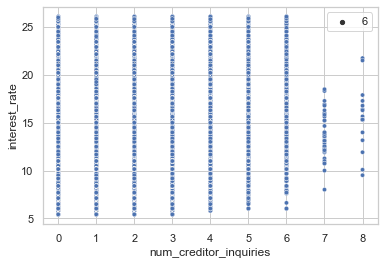

In [62]:
sns.set(style = 'whitegrid')
ax = sns.scatterplot(x = data['num_creditor_inquiries'], y=data['interest_rate'], size = 6)


#### months_since_borrower_last_delinquency  

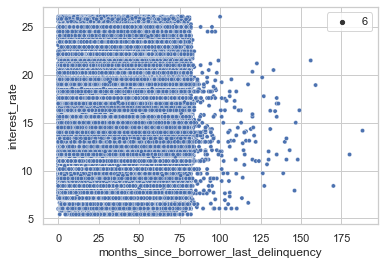

In [63]:
sns.set(style = 'whitegrid')
ax = sns.scatterplot(x = data['months_since_borrower_last_delinquency'], y=data['interest_rate'], size = 6)


Maybe something < or > 75 for a feature? 

#### months_since_last_public_record         

C:\Users\hdfer\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


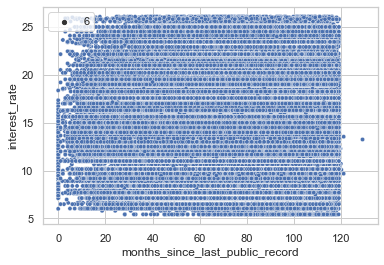

In [64]:
sns.set(style = 'whitegrid')
ax = sns.scatterplot(x = data['months_since_last_public_record'], y=data['interest_rate'], size = 6)


#### Num borrower open credit lines

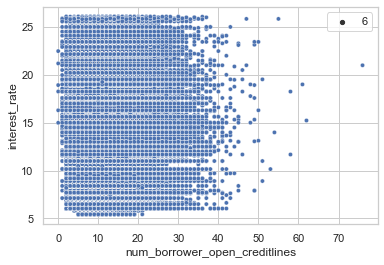

In [65]:
sns.set(style = 'whitegrid')
ax = sns.scatterplot(x = data['num_borrower_open_creditlines'], y=data['interest_rate'], size = 6)

#### num_derogatory_public_records 

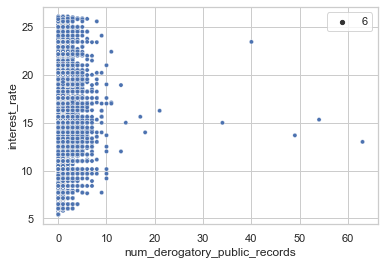

In [66]:
sns.set(style = 'whitegrid')
ax = sns.scatterplot(x = data['num_derogatory_public_records'], y=data['interest_rate'], size = 6)

#### Credit Revolving Balance

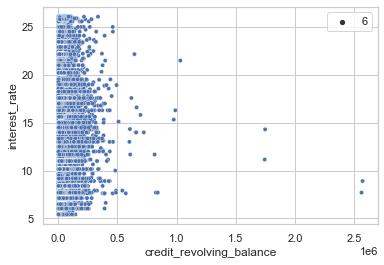

In [67]:
sns.set(style = 'whitegrid')
ax = sns.scatterplot(x = data['credit_revolving_balance'], y=data['interest_rate'], size = 6)

#### Revolving Line utlization rate

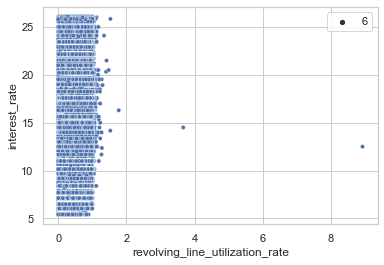

In [68]:
sns.set(style = 'whitegrid')
ax = sns.scatterplot(x = data['revolving_line_utilization_rate'], y=data['interest_rate'], size = 6)

Not informative

#### loan_initial_listing_status             

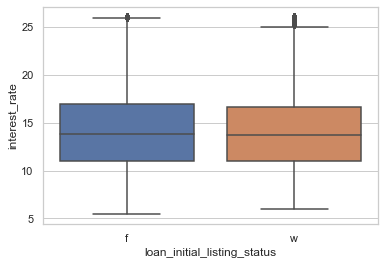

In [69]:
sns.set(style = 'whitegrid')
ax = sns.boxplot(x = data['loan_initial_listing_status'], y= data['interest_rate'])

Can drop this. nothing really to be gained it seems

### Some Notes After visualizing these:

Potential Good Categorical Predictors:
- Num payments
- Loan Grade
- Loan Subgrade
- Income verified
- Loan category

### Clean Loan Requested and Invester Portion

In [70]:
data['loan_requested'] = data['loan_requested'].replace('[\$,]','',regex=True).astype(float)
data['invester_portion'] = data['invester_portion'].replace('[\$,]','',regex=True).astype(float)

# Quick Check for Collinearity

In [71]:
data = data.drop('months_since_borrower_last_delinquency', axis = 1)

In [72]:
data = data.dropna()

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_check_vars = data[['loan_requested','invester_portion','borrower_annual_income','ratio','num_pastdue','num_creditor_inquiries',
                      'months_since_last_public_record','num_borrower_open_creditlines',
                      'num_derogatory_public_records','credit_revolving_balance','revolving_line_utilization_rate',
                       'num_borrower_credit_lines']]
vif = pd.DataFrame()

vif["feature"] = vif_check_vars.columns
vif["VIF"] = [variance_inflation_factor(vif_check_vars.values, i) for i in range(len(vif_check_vars.columns))]

vif

,feature,VIF
0,loan_requested,309.480228
1,invester_portion,305.730741
2,borrower_annual_income,3.434671
3,ratio,7.189266
4,num_pastdue,1.151875
5,num_creditor_inquiries,1.622128
6,months_since_last_public_record,7.111793
7,num_borrower_open_creditlines,12.036892
8,num_derogatory_public_records,1.103989
9,credit_revolving_balance,2.127442


loan_requested and investor portion are highly collinear. need to drop one. 

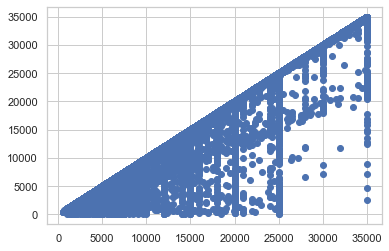

In [74]:
plt.scatter(vif_check_vars.loan_requested, vif_check_vars.invester_portion)

In [75]:
data.loan_requested.corr(data.invester_portion)

#Can't have this. extremely high correlation

0.9935467243145171

In [76]:
data = data.drop('invester_portion',axis = 1)

Dropping investor portion.

## Select Important Features and Get Dummies

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205709 entries, 7 to 399998
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   interest_rate                    205709 non-null  float64
 1   loan_requested                   205709 non-null  float64
 2   num_payments                     205709 non-null  object 
 3   loan_grade                       205709 non-null  object 
 4   loan_subgrade                    205709 non-null  object 
 5   home_ownership_status            205709 non-null  object 
 6   borrower_annual_income           205709 non-null  float64
 7   income_verified                  205709 non-null  object 
 8   loan_category                    205709 non-null  object 
 9   ratio                            205709 non-null  float64
 10  num_pastdue                      205709 non-null  float64
 11  earliest_reported_date           205709 non-null  object 
 12  nu

In [78]:
data_final = data[['interest_rate','loan_requested','borrower_annual_income','ratio',
               'loan_grade','loan_category','income_verified','num_payments','loan_subgrade']]

#num_derogatory_public_records#

In [79]:
data_final.drop(data_final[data_final['loan_category'] == 'educational'].index, inplace = True)

C:\Users\hdfer\AppData\Local\Temp/ipykernel_23852/2413190597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final.drop(data_final[data_final['loan_category'] == 'educational'].index, inplace = True)


In [83]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205527 entries, 7 to 399998
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   interest_rate           205527 non-null  float64
 1   loan_requested          205527 non-null  float64
 2   borrower_annual_income  205527 non-null  float64
 3   ratio                   205527 non-null  float64
 4   loan_category           205527 non-null  object 
 5   income_verified         205527 non-null  object 
 6   num_payments            205527 non-null  object 
 7   loan_subgrade           205527 non-null  object 
dtypes: float64(4), object(4)
memory usage: 14.1+ MB


In [84]:
data_final = pd.get_dummies(data_final)

In [85]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205527 entries, 7 to 399998
Data columns (total 57 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   interest_rate                             205527 non-null  float64
 1   loan_requested                            205527 non-null  float64
 2   borrower_annual_income                    205527 non-null  float64
 3   ratio                                     205527 non-null  float64
 4   loan_category_car                         205527 non-null  uint8  
 5   loan_category_credit_card                 205527 non-null  uint8  
 6   loan_category_debt_consolidation          205527 non-null  uint8  
 7   loan_category_home_improvement            205527 non-null  uint8  
 8   loan_category_house                       205527 non-null  uint8  
 9   loan_category_major_purchase              205527 non-null  uint8  
 10  loan_category_medica

In [86]:
#Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [87]:
X, y = data_final.drop(['interest_rate'], axis=1), data_final['interest_rate']

In [88]:
y.sum()

2863674.9800000004

In [89]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2)

In [90]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164421 entries, 361337 to 126364
Data columns (total 56 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   loan_requested                            164421 non-null  float64
 1   borrower_annual_income                    164421 non-null  float64
 2   ratio                                     164421 non-null  float64
 3   loan_category_car                         164421 non-null  uint8  
 4   loan_category_credit_card                 164421 non-null  uint8  
 5   loan_category_debt_consolidation          164421 non-null  uint8  
 6   loan_category_home_improvement            164421 non-null  uint8  
 7   loan_category_house                       164421 non-null  uint8  
 8   loan_category_major_purchase              164421 non-null  uint8  
 9   loan_category_medical                     164421 non-null  uint8  
 10  loan_category_m

In [91]:
def regressor_model(model):
    regressor = model()
    regressor.fit(train_X,train_y)
    y_pred = regressor.predict(test_X)
    acc = round(regressor.score(test_X,test_y) * 100, 2)
    print("RMSE: ", np.sqrt(mean_squared_error(test_y, y_pred)))
    print("MAE: ", mean_absolute_error(test_y,y_pred))
    print(str(acc) + ' percent')
    return regressor         

# Applying Models now

#### Try Random Forest Regressor

In [92]:
regressor_model(RandomForestRegressor)

RMSE:  0.8336788763550583
MAE:  0.5841896063950816
96.41 percent


RandomForestRegressor()

#### Try Decision Tree Regressor

In [93]:
regressor_model(DecisionTreeRegressor)

RMSE:  1.121118385895059
MAE:  0.7095999367488937
93.5 percent


DecisionTreeRegressor()

#### Try Gradient Boost

In [94]:
# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4,
                               n_estimators=200,
                               random_state=2)

# Fit gb to the training set
gb.fit(train_X, train_y)

# Predict test set labels
y_pred_Gboost = gb.predict(test_X)

# Calculate Accuracy
Gboost_acc = round(gb.score(test_X,test_y) * 100, 2)

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(test_y, y_pred_Gboost)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

#Print Accuracy
print(str(Gboost_acc) + ' percent')


Test set RMSE of gb: 0.891
95.9 percent


Performs super well! But need to get the CV score to test for overfitting

In [95]:
from sklearn.model_selection import cross_val_score

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(gb, train_X, train_y, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 0.89


In [96]:
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
gb.fit(train_X, train_y)

# Predict the labels of the training set
y_pred_train = gb.predict(train_X)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(train_y, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 0.87


#### After several iterations of adjusting model complexity,  Train RMSE, CV RMSE, and Test RMSE are almost equal! Model seems to not be overfitting or underfitting!

# Test model on Holdout Data

In [113]:
df_hold = pd.read_csv('Holdout for Testing.csv')

In [114]:
df_hold.columns = ['interest_rate', 'loan_id', 'borrower_id', 'loan_requested','loan_funded','invester_portion','num_payments',
                'loan_grade','loan_subgrade','job_title','years_employed','home_ownership_status','borrower_annual_income',
                'income_verified','date_issued','loan_reason','loan_category','loan_title','zipcode_3','borrower_state',
                'ratio','num_pastdue','earliest_reported_date','num_creditor_inquiries','months_since_borrower_last_delinquency',
                'months_since_last_public_record','num_borrower_open_creditlines','num_derogatory_public_records',
                'credit_revolving_balance', 'revolving_line_utilization_rate','num_borrower_credit_lines','loan_initial_listing_status']
                

In [115]:
df_hold = df_hold.drop('job_title',axis = 1)
df_hold = df_hold.drop('loan_reason',axis = 1)
df_hold = df_hold.drop('loan_title', axis = 1)
df_hold = df_hold.drop('months_since_borrower_last_delinquency',axis = 1)
df_hold['months_since_last_public_record'] = df_hold['months_since_last_public_record'].interpolate()
df_hold['revolving_line_utilization_rate'] = df_hold['revolving_line_utilization_rate'].str.rstrip('%').astype('float') 
df_hold['revolving_line_utilization_rate'] = df_hold['revolving_line_utilization_rate'].interpolate()
df_hold = df_hold.drop(columns = ['interest_rate'])
df_hold = df_hold.drop(columns = ['years_employed'])
df_hold.info()
df_hold = df_hold.drop(['loan_id','borrower_id'],axis = 1)
df_hold = df_hold.drop('loan_funded',axis = 1)
df_hold = df_hold.drop('date_issued', axis = 1)
df_hold = df_hold.drop('zipcode_3',axis = 1)
df_hold = df_hold.drop('borrower_state', axis = 1)
df_hold['loan_requested'] = df_hold['loan_requested'].replace('[\$,]','',regex=True).astype(float)
df_hold['invester_portion'] = df_hold['invester_portion'].replace('[\$,]','',regex=True).astype(float)
df_hold = df_hold.drop('earliest_reported_date',axis=1)
df_hold = df_hold.drop('invester_portion',axis = 1)
df_hold = df_hold.drop(['loan_initial_listing_status','credit_revolving_balance',
                        'months_since_last_public_record','num_creditor_inquiries',
                       'num_pastdue','num_borrower_credit_lines',
                       'home_ownership_status','revolving_line_utilization_rate',
                       'num_derogatory_public_records','num_borrower_open_creditlines'],axis = 1)
df_hold = df_hold.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   loan_id                          80000 non-null  int64  
 1   borrower_id                      80000 non-null  int64  
 2   loan_requested                   80000 non-null  object 
 3   loan_funded                      80000 non-null  object 
 4   invester_portion                 80000 non-null  object 
 5   num_payments                     80000 non-null  object 
 6   loan_grade                       80000 non-null  object 
 7   loan_subgrade                    80000 non-null  object 
 8   home_ownership_status            80000 non-null  object 
 9   borrower_annual_income           80000 non-null  float64
 10  income_verified                  80000 non-null  object 
 11  date_issued                      80000 non-null  object 
 12  loan_category     

In [116]:
df_hold = df_hold.drop(['loan_grade'], axis = 1)

In [117]:
df_hold.info()
holdout_set = pd.get_dummies(df_hold)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_requested          80000 non-null  float64
 1   num_payments            80000 non-null  object 
 2   loan_subgrade           80000 non-null  object 
 3   borrower_annual_income  80000 non-null  float64
 4   income_verified         80000 non-null  object 
 5   loan_category           80000 non-null  object 
 6   ratio                   80000 non-null  float64
dtypes: float64(3), object(4)
memory usage: 4.3+ MB


In [118]:
holdout_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 56 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   loan_requested                            80000 non-null  float64
 1   borrower_annual_income                    80000 non-null  float64
 2   ratio                                     80000 non-null  float64
 3   num_payments_ 36 months                   80000 non-null  uint8  
 4   num_payments_ 60 months                   80000 non-null  uint8  
 5   loan_subgrade_A1                          80000 non-null  uint8  
 6   loan_subgrade_A2                          80000 non-null  uint8  
 7   loan_subgrade_A3                          80000 non-null  uint8  
 8   loan_subgrade_A4                          80000 non-null  uint8  
 9   loan_subgrade_A5                          80000 non-null  uint8  
 10  loan_subgrade_B1                  

In [119]:
# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4,
                               n_estimators=200,
                               random_state=2)
# Fit gb to the training set
gb.fit(train_X, train_y)

# Predict test set labels
holdout_prediction = gb.predict(holdout_set)


holdout_prediction

C:\Users\hdfer\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([24.71410291, 23.45830134, 23.80122478, ..., 15.44964997,
       25.50232643, 25.75714444])

In [120]:
predict = pd.DataFrame({
        "interest_rate": holdout_prediction
    })

In [121]:
predict.to_csv('Loan Prediction Results From Henry Fernandez.csv', index=False)